<img src="./images/happiness_report_2023.png" width="450" style="margin-left: 0px;">

In [35]:
import pandas as pd

happiness_df = pd.read_csv('./datasets/happiness_report_2023.csv')
display(happiness_df)

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394
...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117
134,Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051
135,Lebanon,Middle East and North Africa,2.392,1.417,0.476,0.398,0.123,0.061,0.027


In [36]:
print(happiness_df.columns)
print(happiness_df.index)
print(happiness_df.index.values)

Index(['country', 'region', 'happiness_score', 'gdp_per_capita',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption'],
      dtype='object')
RangeIndex(start=0, stop=137, step=1)
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136]


In [37]:
happiness_df.info()
happiness_df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       137 non-null    object 
 1   region                        137 non-null    object 
 2   happiness_score               137 non-null    float64
 3   gdp_per_capita                137 non-null    float64
 4   social_support                137 non-null    float64
 5   healthy_life_expectancy       136 non-null    float64
 6   freedom_to_make_life_choices  137 non-null    float64
 7   generosity                    137 non-null    float64
 8   perceptions_of_corruption     137 non-null    float64
dtypes: float64(7), object(2)
memory usage: 9.8+ KB


country                          object
region                           object
happiness_score                 float64
gdp_per_capita                  float64
social_support                  float64
healthy_life_expectancy         float64
freedom_to_make_life_choices    float64
generosity                      float64
perceptions_of_corruption       float64
dtype: object

In [38]:
# happiness_df.happiness_score.describe().T
happiness_df.gdp_per_capita.describe().T

count    137.000000
mean       1.406985
std        0.432963
min        0.000000
25%        1.099000
50%        1.449000
75%        1.798000
max        2.200000
Name: gdp_per_capita, dtype: float64

In [39]:
import numpy as np
from scipy.stats import iqr

iqr_value = iqr(happiness_df.happiness_score)
print(iqr_value)

iqr_gdp_value = iqr(happiness_df.gdp_per_capita)
print(iqr_gdp_value)

1.6099999999999994
0.6990000000000001


In [40]:
happiness_Q1 = np.percentile(happiness_df.happiness_score, 25)
happiness_Q3 = np.percentile(happiness_df.happiness_score, 75)
happiness_gdp_Q1 = np.percentile(happiness_df.gdp_per_capita, 25)
happiness_gdp_Q3 = np.percentile(happiness_df.gdp_per_capita, 75)

lower_bound = happiness_Q1 - 1.5 * iqr_value
upper_bound = happiness_Q3 + 1.5 * iqr_value
print(f'정상치 범위: {lower_bound} ~ {upper_bound}')

lower_bound_gdp = happiness_gdp_Q1 - 1.5 * iqr_gdp_value
upper_bound_gdp = happiness_gdp_Q3 + 1.5 * iqr_gdp_value
print(f'정상치 범위: {lower_bound_gdp} ~ {upper_bound_gdp}')

정상치 범위: 2.309000000000001 ~ 8.748999999999999
정상치 범위: 0.05049999999999977 ~ 2.8465000000000003


In [41]:
condition1 = happiness_df.happiness_score >= lower_bound
condition2 = happiness_df.happiness_score <= upper_bound
condition = condition1 & condition2

happiness_df = happiness_df[condition]
happiness_df

condition1_gdp = happiness_df.gdp_per_capita >= lower_bound_gdp
condition2_gdp = happiness_df.gdp_per_capita <= upper_bound_gdp
condition_gdp = condition1_gdp & condition2_gdp

happiness_df = happiness_df[condition_gdp]
happiness_df

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394
...,...,...,...,...,...,...,...,...,...
131,Botswana,Sub-Saharan Africa,3.435,1.471,1.041,0.087,0.480,0.021,0.071
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117
134,Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051


In [42]:
happiness_df.isna().sum()

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         1
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64

In [43]:
happiness_df[happiness_df.healthy_life_expectancy.isna()].index

Index([98], dtype='int64')

In [44]:
happiness_df.drop(index=happiness_df[happiness_df.healthy_life_expectancy.isna()].index, axis=0, inplace=True)

In [45]:
happiness_df.reset_index(drop=True, inplace=True)
happiness_df

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394
...,...,...,...,...,...,...,...,...,...
129,Botswana,Sub-Saharan Africa,3.435,1.471,1.041,0.087,0.480,0.021,0.071
130,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068
131,Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117
132,Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051


In [46]:
happiness_df.duplicated().sum()

np.int64(0)

In [47]:
hp_mean_df = happiness_df.groupby('gdp_per_capita').mean('happiness_score').reset_index()
hp_mean_df

,gdp_per_capita,happiness_score,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,0.531,3.207,0.784,0.105,0.375,0.183,0.068
1,0.561,4.501,0.628,0.137,0.540,0.154,0.140
2,0.570,4.954,0.885,0.000,0.625,0.161,0.192
3,0.622,4.397,0.962,0.043,0.393,0.255,0.088
4,0.628,4.042,0.644,0.141,0.471,0.219,0.071
...,...,...,...,...,...,...,...
125,2.015,6.571,1.223,0.401,0.745,0.188,0.247
126,2.022,7.240,1.463,0.582,0.678,0.151,0.475
127,2.152,6.911,1.425,0.539,0.656,0.186,0.409
128,2.168,6.587,1.354,0.607,0.660,0.170,0.561


In [48]:
hp_min_df = happiness_df.groupby('gdp_per_capita').min('happiness_score').reset_index()
hp_min_df

,gdp_per_capita,happiness_score,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,0.531,3.207,0.784,0.105,0.375,0.183,0.068
1,0.561,4.501,0.628,0.137,0.540,0.154,0.140
2,0.570,4.954,0.885,0.000,0.625,0.161,0.192
3,0.622,4.397,0.962,0.043,0.393,0.255,0.088
4,0.628,4.042,0.644,0.141,0.471,0.219,0.071
...,...,...,...,...,...,...,...
125,2.015,6.571,1.223,0.401,0.745,0.188,0.247
126,2.022,7.240,1.463,0.582,0.678,0.151,0.475
127,2.152,6.911,1.425,0.539,0.656,0.186,0.409
128,2.168,6.587,1.354,0.607,0.660,0.170,0.561


In [49]:
hp_max_df = happiness_df.groupby('gdp_per_capita').max('happiness_score').reset_index()
hp_max_df

,gdp_per_capita,happiness_score,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,0.531,3.207,0.784,0.105,0.375,0.183,0.068
1,0.561,4.501,0.628,0.137,0.540,0.154,0.140
2,0.570,4.954,0.885,0.000,0.625,0.161,0.192
3,0.622,4.397,0.962,0.043,0.393,0.255,0.088
4,0.628,4.042,0.644,0.141,0.471,0.219,0.071
...,...,...,...,...,...,...,...
125,2.015,6.571,1.223,0.401,0.745,0.188,0.247
126,2.022,7.240,1.463,0.582,0.678,0.151,0.475
127,2.152,6.911,1.425,0.539,0.656,0.186,0.409
128,2.168,6.587,1.354,0.607,0.660,0.170,0.561


In [57]:
hp_std_df = happiness_df.groupby('gdp_per_capita')['happiness_score'].std().reset_index()
hp_std_df

,gdp_per_capita,happiness_score
0,0.531,NaN
1,0.561,NaN
2,0.570,NaN
3,0.622,NaN
4,0.628,NaN
...,...,...
125,2.015,NaN
126,2.022,NaN
127,2.152,NaN
128,2.168,NaN


In [59]:
import pandas as pd

happiness_df = pd.read_csv('./datasets/happiness_report_2023.csv')
display(happiness_df)

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394
...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117
134,Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051
135,Lebanon,Middle East and North Africa,2.392,1.417,0.476,0.398,0.123,0.061,0.027


In [82]:
happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135 entries, 0 to 135
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       135 non-null    object 
 1   region                        135 non-null    object 
 2   happiness_score               135 non-null    float64
 3   gdp_per_capita                135 non-null    float64
 4   social_support                135 non-null    float64
 5   healthy_life_expectancy       135 non-null    float64
 6   freedom_to_make_life_choices  135 non-null    float64
 7   generosity                    135 non-null    float64
 8   perceptions_of_corruption     135 non-null    float64
dtypes: float64(7), object(2)
memory usage: 10.5+ KB


In [83]:
happiness_df.describe().T

,count,mean,std,min,25%,50%,75%,max
happiness_score,135.0,5.571741,1.101689,2.392,4.7895,5.703,6.3510,7.804
gdp_per_capita,135.0,1.414578,0.430520,0.000,1.1000,1.454,1.7980,2.200
social_support,135.0,1.163644,0.312841,0.242,0.9670,1.227,1.4015,1.620
healthy_life_expectancy,135.0,0.368244,0.155401,0.000,0.2510,0.390,0.4890,0.702
freedom_to_make_life_choices,135.0,0.544919,0.142720,0.117,0.4620,0.558,0.6575,0.772
generosity,135.0,0.149504,0.076121,0.000,0.1000,0.138,0.1995,0.422
perceptions_of_corruption,135.0,0.147126,0.127256,0.000,0.0600,0.113,0.1895,0.561


In [64]:
happiness_df.isna().sum()

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64

In [63]:
happiness_df.drop(index=happiness_df[happiness_df.healthy_life_expectancy.isna()].index, axis=0, inplace=True)
happiness_df

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394
...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117
134,Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051
135,Lebanon,Middle East and North Africa,2.392,1.417,0.476,0.398,0.123,0.061,0.027


In [66]:
happiness_Q1 = np.percentile(happiness_df.happiness_score, 25)
happiness_Q3 = np.percentile(happiness_df.happiness_score, 75)
print(happiness_Q1, happiness_Q3)

iqr_value = happiness_Q3 - happiness_Q1
print(iqr_value)

lower_bound = happiness_Q1 - 1.5 * iqr_value
upper_bound = happiness_Q3 + 1.5 * iqr_value
print(f'정상치 범위: {lower_bound} ~ {upper_bound}')

4.702500000000001 6.342499999999999
1.6399999999999988
정상치 범위: 2.2425000000000024 ~ 8.802499999999998


In [67]:
import numpy as np
from scipy.stats import iqr

iqr_value = iqr(happiness_df.happiness_score)
print(iqr_value)

happiness_Q1 = np.percentile(happiness_df.happiness_score, 25)
happiness_Q3 = np.percentile(happiness_df.happiness_score, 75)

lower_bound = happiness_Q1 - 1.5 * iqr_value
upper_bound = happiness_Q3 + 1.5 * iqr_value
print(f'정상치 범위: {lower_bound} ~ {upper_bound}')

1.6399999999999988
정상치 범위: 2.2425000000000024 ~ 8.802499999999998


In [68]:
condition1 = happiness_df.happiness_score >= lower_bound
condition2 = happiness_df.happiness_score <= upper_bound
condition = condition1 & condition2

happiness_df = happiness_df[condition]
happiness_df

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394
...,...,...,...,...,...,...,...,...,...
131,Botswana,Sub-Saharan Africa,3.435,1.471,1.041,0.087,0.480,0.021,0.071
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117
134,Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051


In [70]:
happiness_df.duplicated().sum()

np.int64(0)

In [72]:
hp_std_df = happiness_df.groupby('happiness_score')['gdp_per_capita'].std().reset_index()
hp_std_df

,happiness_score,gdp_per_capita
0,2.392,NaN
1,3.138,NaN
2,3.204,NaN
3,3.207,NaN
4,3.435,NaN
...,...,...
127,7.403,NaN
128,7.473,NaN
129,7.530,NaN
130,7.586,NaN


<Axes: title={'center': 'max'}, xlabel='gdp_per_capita'>

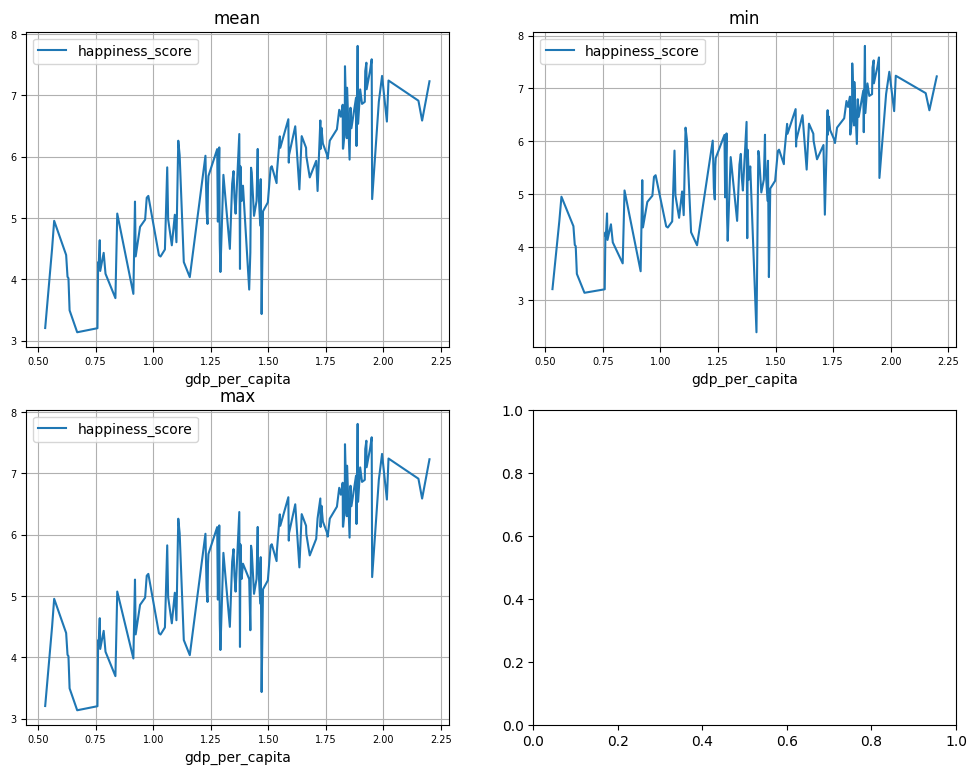

In [76]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 9))

hp_mean_df.plot(title='mean', x='gdp_per_capita', y='happiness_score', fontsize='7', kind='line', grid=True, ax=axes[0, 0])
hp_min_df.plot(title='min', x='gdp_per_capita', y='happiness_score', fontsize='7', kind='line', grid=True, ax=axes[0, 1])
hp_max_df.plot(title='max', x='gdp_per_capita', y='happiness_score', fontsize='7', kind='line', grid=True, ax=axes[1, 0])

In [77]:
import seaborn as sns

sns.__version__

'0.13.2'

In [78]:
import numpy as np

np.sort(happiness_df.gdp_per_capita.unique())

array([0.   , 0.531, 0.561, 0.57 , 0.622, 0.628, 0.632, 0.637, 0.67 ,
       0.758, 0.761, 0.763, 0.768, 0.77 , 0.785, 0.793, 0.836, 0.844,
       0.914, 0.921, 0.924, 0.943, 0.965, 0.972, 0.979, 1.025, 1.032,
       1.051, 1.061, 1.065, 1.081, 1.094, 1.099, 1.101, 1.109, 1.115,
       1.133, 1.159, 1.227, 1.232, 1.236, 1.238, 1.24 , 1.278, 1.281,
       1.287, 1.289, 1.292, 1.305, 1.333, 1.343, 1.349, 1.353, 1.358,
       1.374, 1.377, 1.379, 1.384, 1.39 , 1.417, 1.422, 1.425, 1.428,
       1.438, 1.449, 1.454, 1.455, 1.465, 1.466, 1.467, 1.471, 1.477,
       1.498, 1.51 , 1.515, 1.536, 1.537, 1.55 , 1.552, 1.587, 1.589,
       1.59 , 1.617, 1.635, 1.645, 1.664, 1.665, 1.68 , 1.708, 1.714,
       1.726, 1.727, 1.731, 1.737, 1.754, 1.758, 1.767, 1.798, 1.808,
       1.815, 1.823, 1.824, 1.825, 1.832, 1.833, 1.841, 1.842, 1.853,
       1.856, 1.857, 1.861, 1.881, 1.883, 1.888, 1.89 , 1.899, 1.907,
       1.919, 1.921, 1.926, 1.927, 1.942, 1.949, 1.951, 1.98 , 1.994,
       2.015, 2.022,

In [81]:
np.sort(happiness_df.happiness_score.unique())

array([2.392, 3.138, 3.204, 3.207, 3.435, 3.495, 3.545, 3.694, 3.982,
       4.019, 4.036, 4.042, 4.091, 4.12 , 4.137, 4.17 , 4.198, 4.279,
       4.282, 4.372, 4.374, 4.393, 4.397, 4.432, 4.442, 4.487, 4.497,
       4.501, 4.555, 4.605, 4.614, 4.631, 4.638, 4.724, 4.855, 4.876,
       4.903, 4.941, 4.954, 4.973, 4.981, 5.035, 5.053, 5.071, 5.072,
       5.109, 5.111, 5.211, 5.254, 5.267, 5.275, 5.277, 5.308, 5.329,
       5.33 , 5.342, 5.36 , 5.466, 5.523, 5.526, 5.559, 5.569, 5.63 ,
       5.633, 5.661, 5.684, 5.703, 5.722, 5.738, 5.763, 5.818, 5.819,
       5.825, 5.84 , 5.843, 5.902, 5.931, 5.951, 5.968, 6.012, 6.014,
       6.023, 6.024, 6.041, 6.122, 6.125, 6.129, 6.13 , 6.144, 6.15 ,
       6.173, 6.213, 6.259, 6.26 , 6.265, 6.3  , 6.33 , 6.334, 6.368,
       6.405, 6.436, 6.455, 6.463, 6.469, 6.494, 6.535, 6.571, 6.587,
       6.589, 6.609, 6.65 , 6.661, 6.763, 6.796, 6.845, 6.859, 6.892,
       6.894, 6.911, 6.961, 7.095, 7.097, 7.123, 7.228, 7.24 , 7.315,
       7.395, 7.403,

In [85]:
happiness_df.drop(happiness_df[happiness_df.gdp_per_capita == 0].index, axis=0, inplace=True)

C:\temp\ipykernel_24884\1887797313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  happiness_df.drop(happiness_df[happiness_df.gdp_per_capita == 0].index, axis=0, inplace=True)


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (130,) and arg 1 with shape (131,).

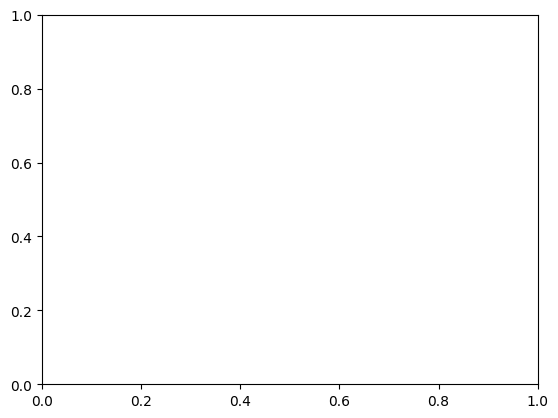

In [86]:
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.bar(x=np.sort(happiness_df.gdp_per_capita.unique()), height=happiness_df.groupby('happiness_score')['gdp_per_capita'].mean()) 
plt.show() 

sns.barplot(x='happiness_score', y='gdp_per_capita', data=happiness_df)